In [ ]:
import tensorflow as tf #the deeplearning library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#the data is already cleaned and processed
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode="fine")

169001437/169001437 [==============================] - 95s 1us/step


In [ ]:
print(f'The shape of X_train is :{X_train.shape}','\t',f'The shape of Y_train is :{y_train.shape}','\n', f'The shape of X_test is :{X_test.shape}','\t',f'The shape of y_test is :{y_test.shape}')

The shape of X_train is :(50000, 32, 32, 3) 	 The shape of Y_train is :(50000, 1) 
 The shape of X_test is :(10000, 32, 32, 3) 	 The shape of y_test is :(10000, 1)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, input_shape=(32, 32, 3), kernel_size=(2, 2), strides=(1, 1)),
    tf.keras.layers.MaxPooling2D(strides=(1, 1)),
    tf.keras.layers.Conv2D(64, kernel_size=(2, 2)),
    tf.keras.layers.MaxPooling2D(strides=(1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 707s 447ms/step - loss: 3.6871 - accuracy: 0.1471
Epoch 2/30
1563/1563 [==============================] - 618s 396ms/step - loss: 2.9522 - accuracy: 0.2720
Epoch 3/30
1563/1563 [==============================] - 677s 433ms/step - loss: 2.5699 - accuracy: 0.3423
Epoch 4/30
1563/1563 [==============================] - 595s 381ms/step - loss: 2.2092 - accuracy: 0.4200
Epoch 5/30
 982/1563 [=================>............] - ETA: 3:40 - loss: 1.7942 - accuracy: 0.5073

In [ ]:
scores = model.evaluate(X_test, y_test)
print(scores)

313/313 [==============================] - 1s 4ms/step - loss: 12.4926 - accuracy: 0.2678
[12.492570877075195, 0.2678000032901764]


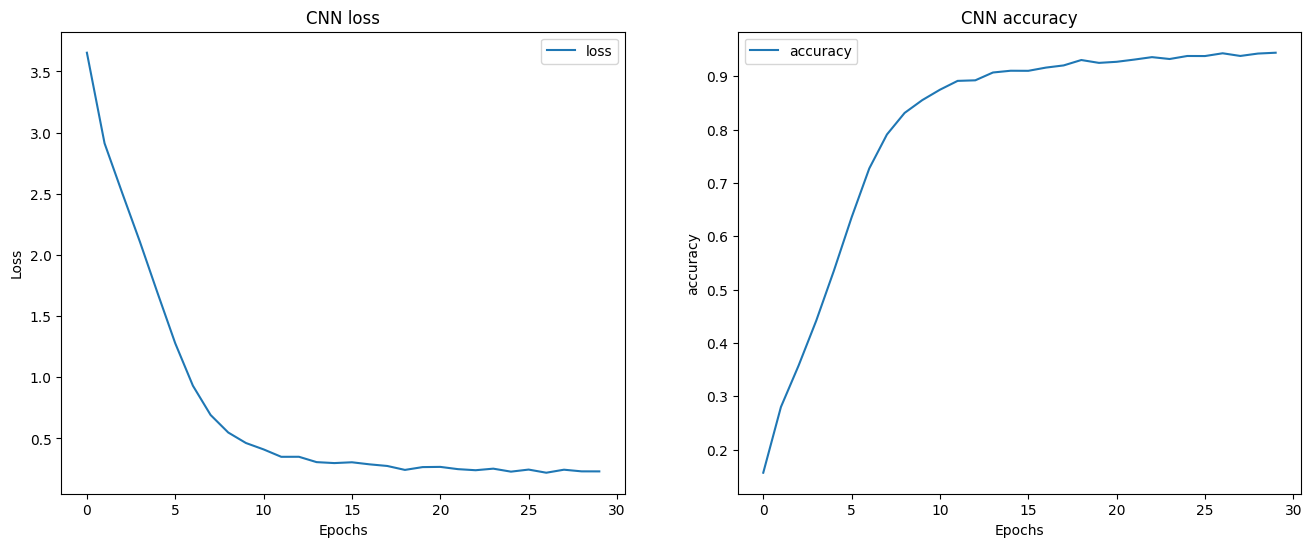

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax1.plot(history.history['loss'], label='loss')
ax1.set_title('CNN loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='accuracy')
ax2.set_title('CNN accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()